In [526]:
#loading all lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [499]:
#checking general info on the data to find data size and content
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print(bank_df.head())
print("Shape of data",bank_df.shape)
print("------Bank info ------")
print(bank_df.info())
#5000 row and 14 column

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
Shape of data (5000, 14)
------Bank info ------
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [500]:
#check null value and special character
print("Null check on data frame",bank_df.isnull().sum().sum())
bank_df.describe()


Null check on data frame 0


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Looking at data seems like Experience is not good. Some values are entered wrong. May be a negative number. Rest looks good, some of the value like Education, Personal Loand, Securities Account, Online, Credit card and Education are numerial but they are infact categorical variable. Also Mortgage is also showing skewness as min, q1 q2 are zero, ccAvg also have many zero. But i am not going to change CCAvga and Mortgage as zero is valid number for the variable.

In [501]:
#let's check Experience and fix it if required
bank_df[bank_df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [502]:
#Data on experience seems to indicate that a typo has been made and Age indicate that these numbers should be just +ve
bank_df['Experience'] = bank_df['Experience'].map(abs)
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The 'Experience' column has been fixed and now data looks good. Now I am going to plot some distribution to get a feel on the data and co-relation.

Create a new data frame so that changing column value will not change original frame, column of interest that may require change Income, mortgage, age and CCAvg, So that these column can be divide into  broad category and compare, which makes it easier to find the co-relation.

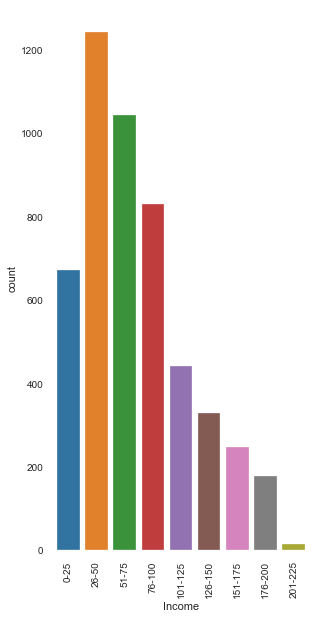

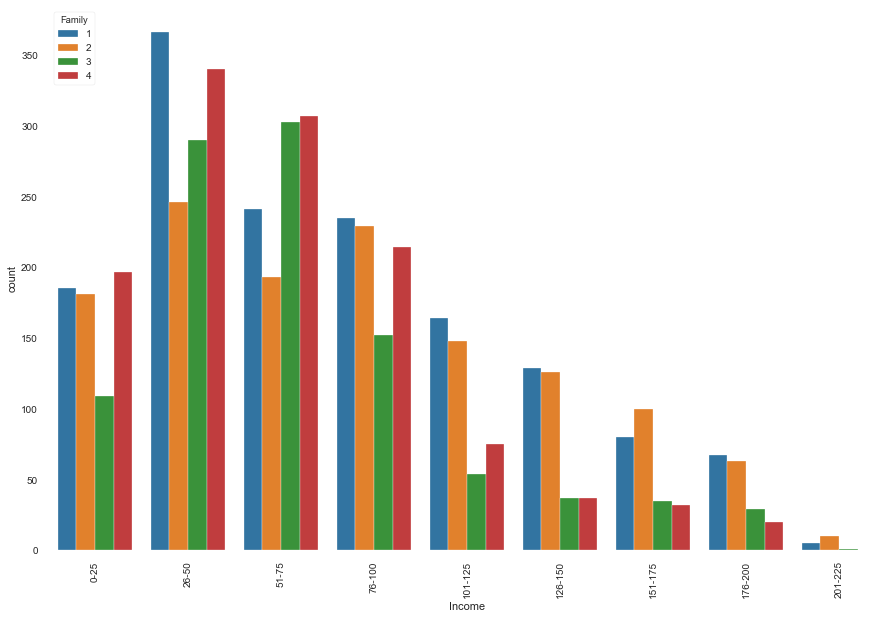

In [503]:
cp_bank_df = bank_df.copy()
# Make bin to cover min max of the Income
bin_edges = [-np.inf, 25, 50,75,100, 125, 150, 175, 200, 225]         # edges to define intervals
bin_labels = ['0-25', '26-50', '51-75','76-100','101-125', '126-150', '151-175',
              '176-200','201-225']               # labels to denote each interval of income

#Modified above income to the range number
cp_bank_df['Income'] = pd.cut(cp_bank_df['Income'], bins=bin_edges , labels=bin_labels)
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Income',data=cp_bank_df)
plt.xticks(rotation=90)
# plt.subplot(1, 2, 2)
plt.figure(figsize=(15,10))
sns.countplot(x = 'Income',data=cp_bank_df,hue='Family')
# it plots a barplot where y axis shows the count of each category and here 'hue' 
#is used to represent diffrenent Family size
plt.xticks(rotation=90) # to rotate labels of x-axis
plt.show()
# This family size and Income distribution is to check if number of member in Family impact income

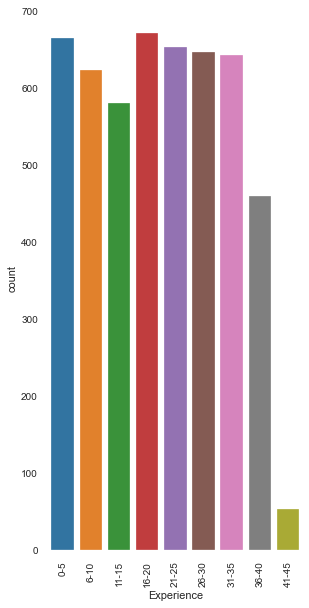

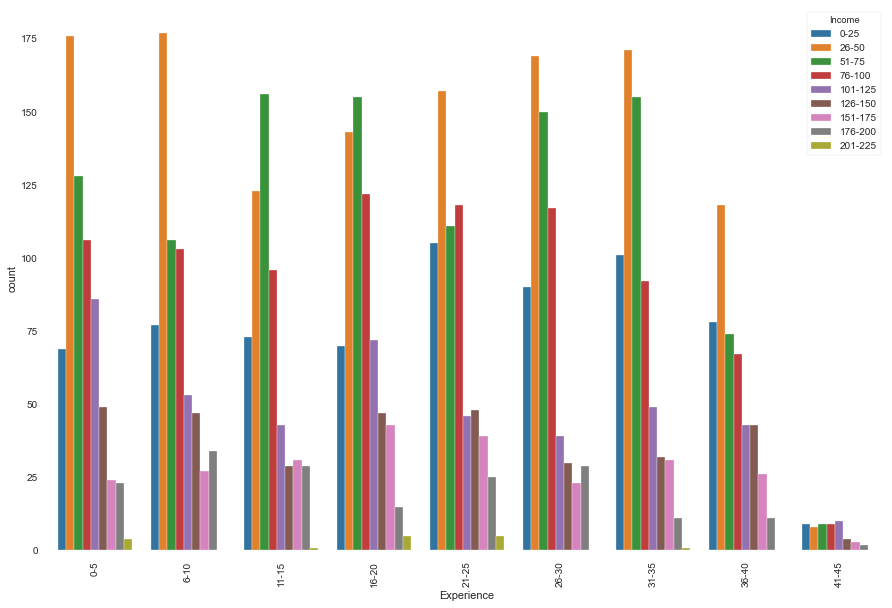

In [504]:
#Lets do same for Experience also to check how Experience and Income goes
bin_edges = [-np.inf, 5, 10,15,20, 25, 30, 35, 40, 45]         # edges to define intervals for experience
bin_labels = ['0-5', '6-10', '11-15','16-20','21-25', '26-30', '31-35',
              '36-40', '41-45']               # labels to denote each interval of experience

#Modified above Experience to the range number
cp_bank_df['Experience'] = pd.cut(cp_bank_df['Experience'], bins=bin_edges , labels=bin_labels)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Experience',data=cp_bank_df)
plt.xticks(rotation=90)
# plt.subplot(1, 2, 2)
plt.figure(figsize=(15,10))
sns.countplot(x = 'Experience',data=cp_bank_df,hue='Income')
# it plots a barplot where y axis shows the count of each category and here 
#'hue' is used to represent Income category
plt.xticks(rotation=90) # to rotate labels of x-axis
plt.show()

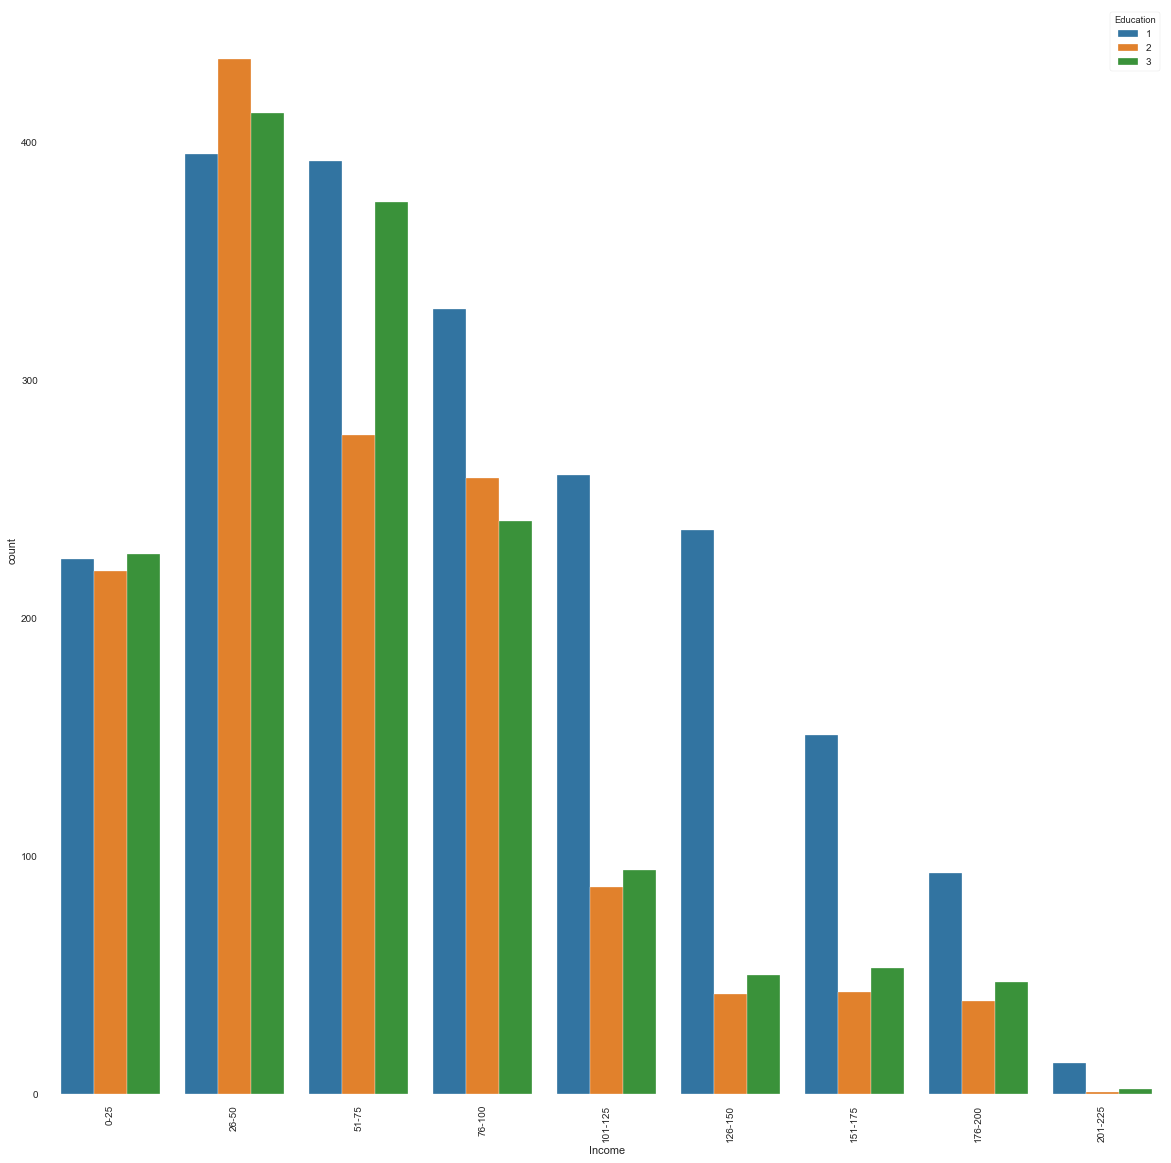

In [505]:
# Lets check how Education and Income play

plt.figure(figsize=(20,20))
sns.countplot(x = 'Income',data=cp_bank_df,hue='Education')
plt.xticks(rotation=90) # to rotate labels of x-axis
plt.show()

In [506]:
#Let's drop some unwanted column and plot pair plot
#checked if zip needs to be stutied it has 467 unique value
print (len(bank_df['ZIP Code'].unique()))
#Drop ID and zip code
bank_truncated_df = bank_df.drop(['ID', 'ZIP Code'], axis = 1)


467


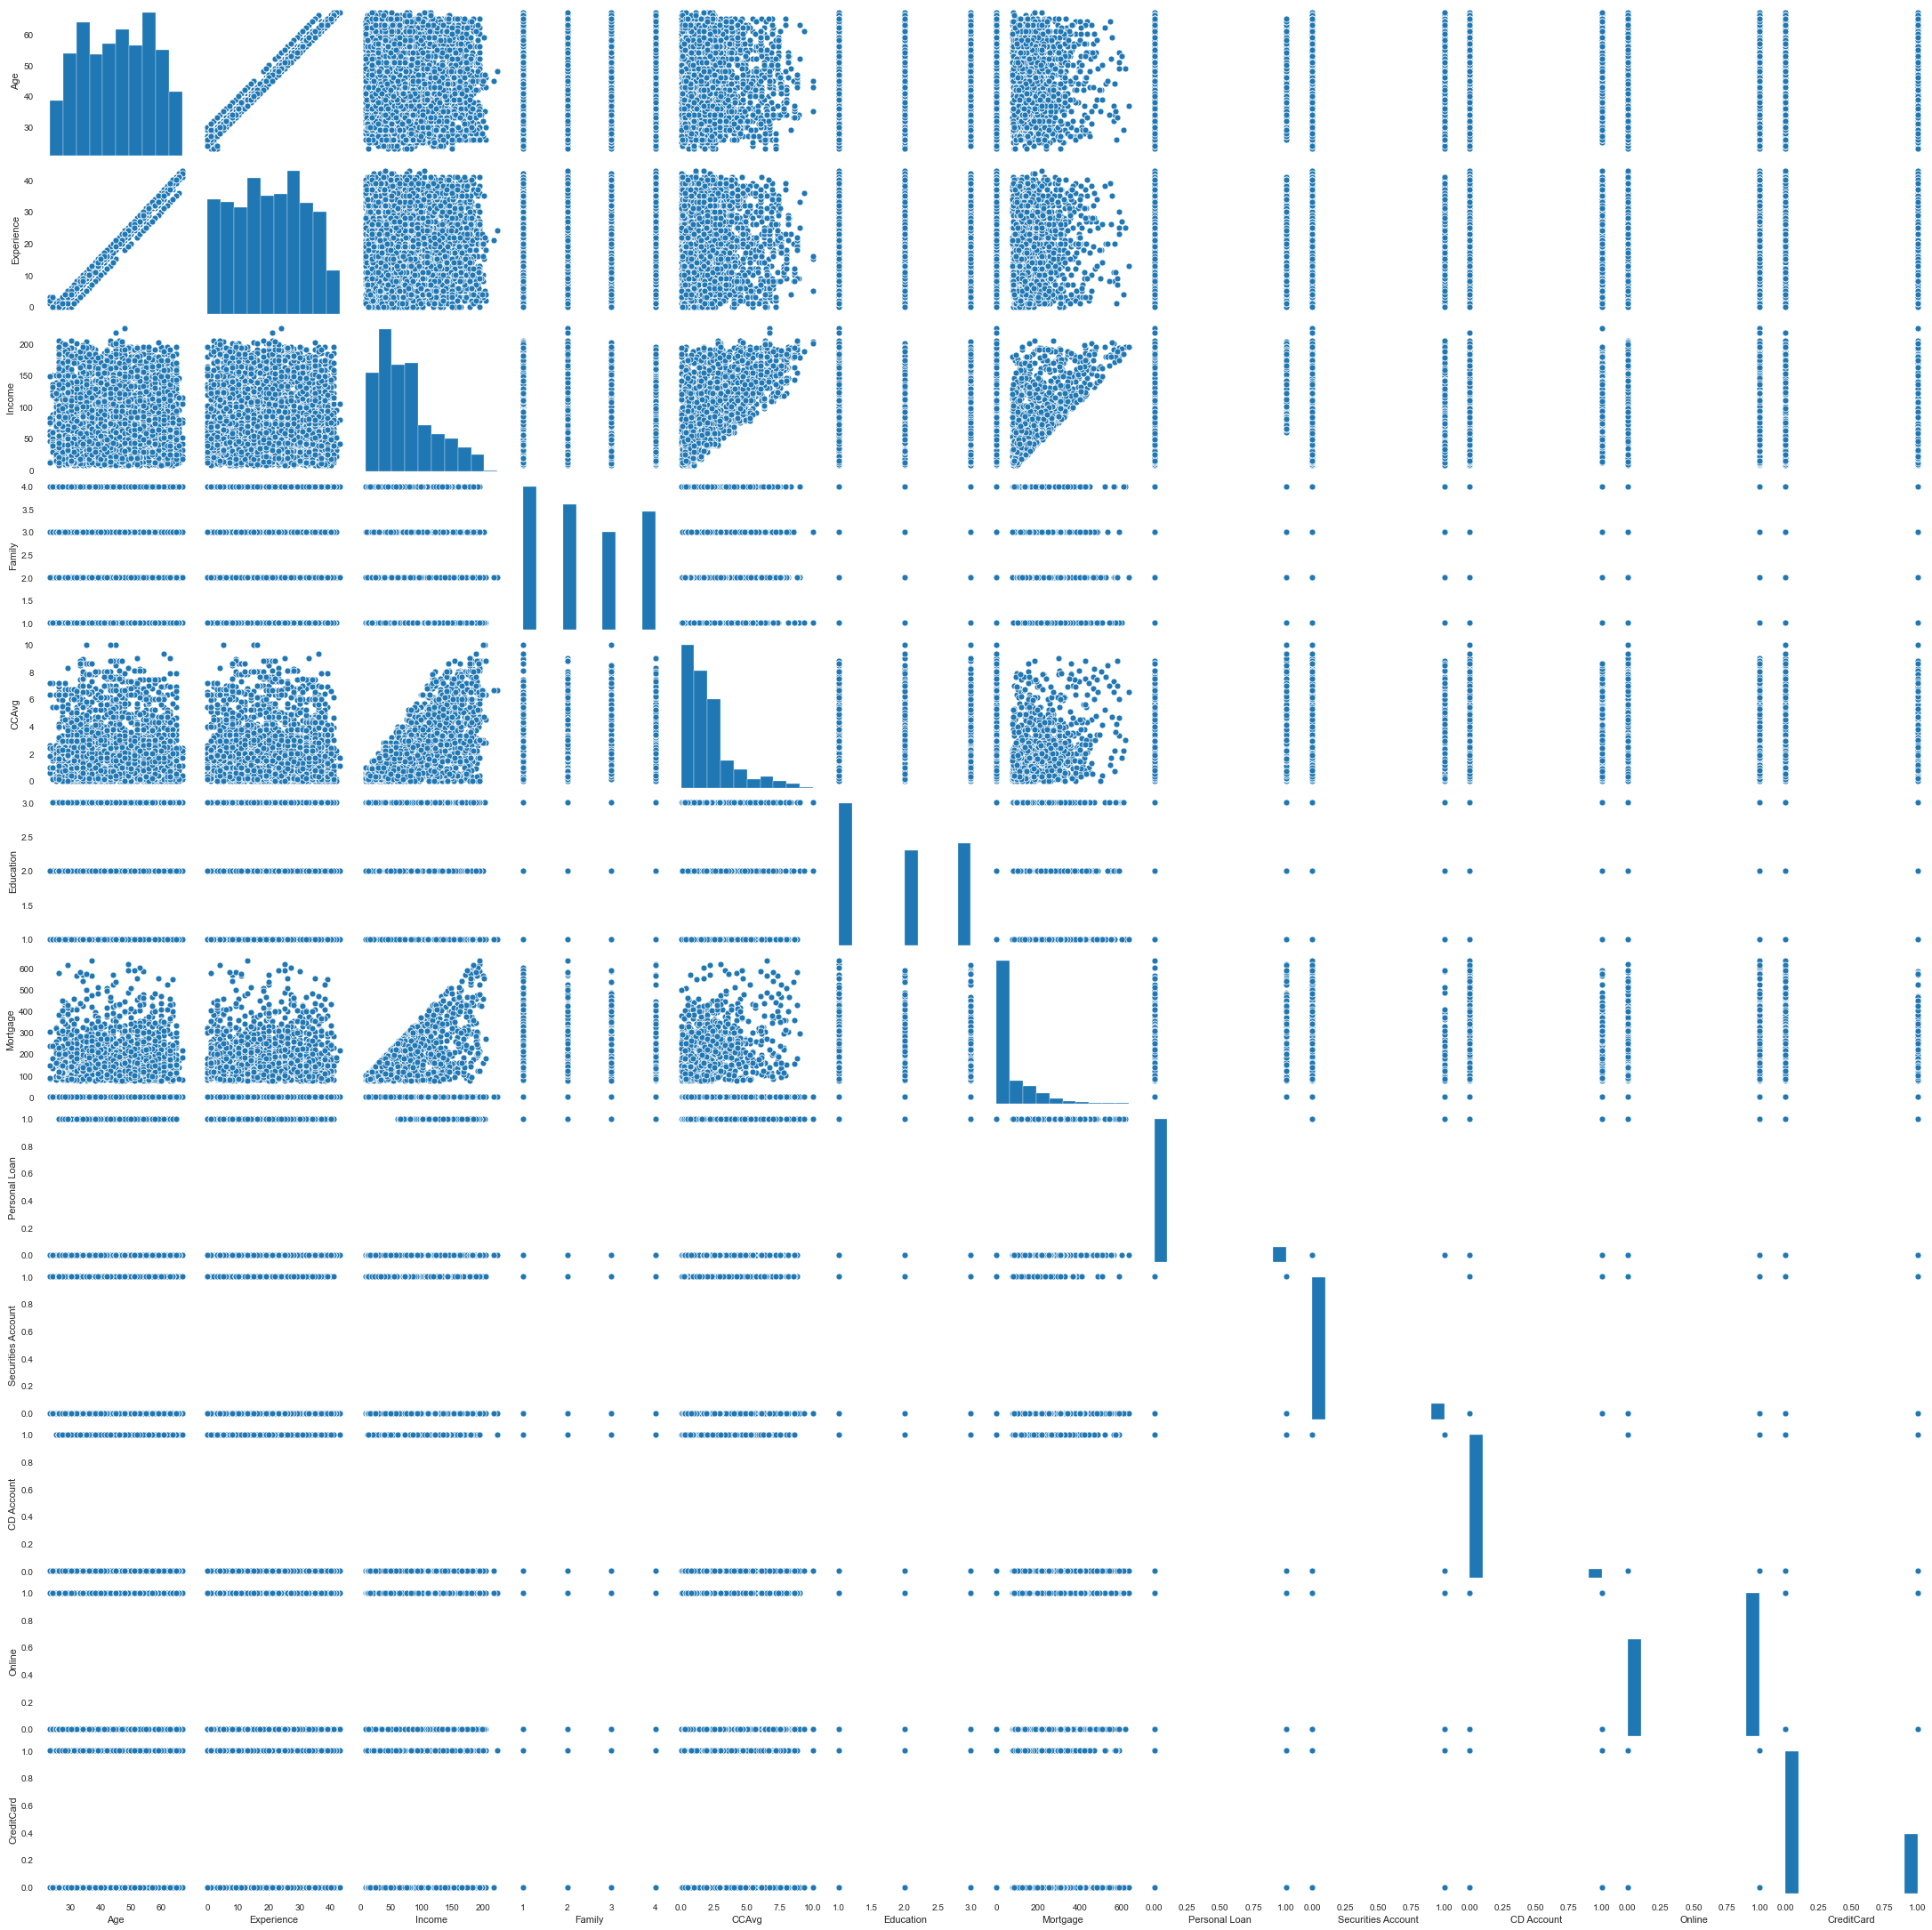

In [507]:
bank_truncated_df.head()
sns.pairplot(bank_truncated_df)

In [508]:
#Co-relation matrix will be good to cross verify the pair plot
cor_df=bank_truncated_df.corr()
cor_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [509]:
#Check all significant positive corelation that has value .3 or greater
cor_df[cor_df>.3]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Experience,0.993991,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,1.000000,NaN,0.645984,NaN,NaN,0.502462,NaN,NaN,NaN,NaN
Family,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,NaN,NaN,0.645984,NaN,1.000000,NaN,NaN,0.366889,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Personal Loan,NaN,NaN,0.502462,NaN,0.366889,NaN,NaN,1.000000,NaN,0.316355,NaN,NaN
Securities Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.317034,NaN,NaN
CD Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.316355,0.317034,1.000000,NaN,NaN


Linear co-relation that is worth exploring (hence i have taken .5 as cutoff)
1. Age and Experience have positive linear relationship
2. CCAvg and income also have positive relationship. CCAvg is average spending on credit card
3.Age and income do not show good linear relationship. I was thinking they will have
4. Income and Personal loan has positive relationship
5. Personal Loan have positive relation ship with Income CCAvg and CD Account

In [510]:
#Check all negative corelation that has value -.0 or lesser
cor_df[cor_df<-.0]


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,NaN,NaN,-0.055269,-0.046418,-0.052012,NaN,-0.012539,-0.007726,-0.000436,NaN,NaN,NaN
Experience,NaN,NaN,-0.046876,-0.051851,-0.049738,NaN,-0.011097,-0.008304,-0.000989,NaN,NaN,NaN
Income,-0.055269,-0.046876,NaN,-0.157501,NaN,-0.187524,NaN,NaN,-0.002616,NaN,NaN,-0.002385
Family,-0.046418,-0.051851,-0.157501,NaN,-0.109275,NaN,-0.020445,NaN,NaN,NaN,NaN,NaN
CCAvg,-0.052012,-0.049738,NaN,-0.109275,NaN,-0.136124,NaN,NaN,NaN,NaN,-0.003611,-0.006689
Education,NaN,NaN,-0.187524,NaN,-0.136124,NaN,-0.033327,NaN,-0.010812,NaN,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,NaN,-0.020445,NaN,-0.033327,NaN,NaN,-0.005411,NaN,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities Account,-0.000436,-0.000989,-0.002616,NaN,NaN,-0.010812,-0.005411,NaN,NaN,NaN,NaN,-0.015028
CD Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some of the negative co-relation which are very low in value but good to watch when logit function provides cofficient values are 
1. Age has negative relationship with target variable Personal loan
2. Experience has negative relation ship

In [511]:
# As we have not checked much into CCAvg and Income. Let's draw some plots and understand how it
# looks, converting CCAvg into bin
bin_edges = [-np.inf, 2, 4,6,8, 10]         # edges to define intervals for experience
bin_labels = ['0-2', '3-4', '5-6','7-8','9-10']               # labels to denote each interval of experience

#Modified above Experience to the range number
cp_bank_df['CCAvg'] = pd.cut(cp_bank_df['CCAvg'], bins=bin_edges , labels=bin_labels)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0-25'),
  Text(1, 0, '26-50'),
  Text(2, 0, '51-75'),
  Text(3, 0, '76-100'),
  Text(4, 0, '101-125'),
  Text(5, 0, '126-150'),
  Text(6, 0, '151-175'),
  Text(7, 0, '176-200'),
  Text(8, 0, '201-225')])

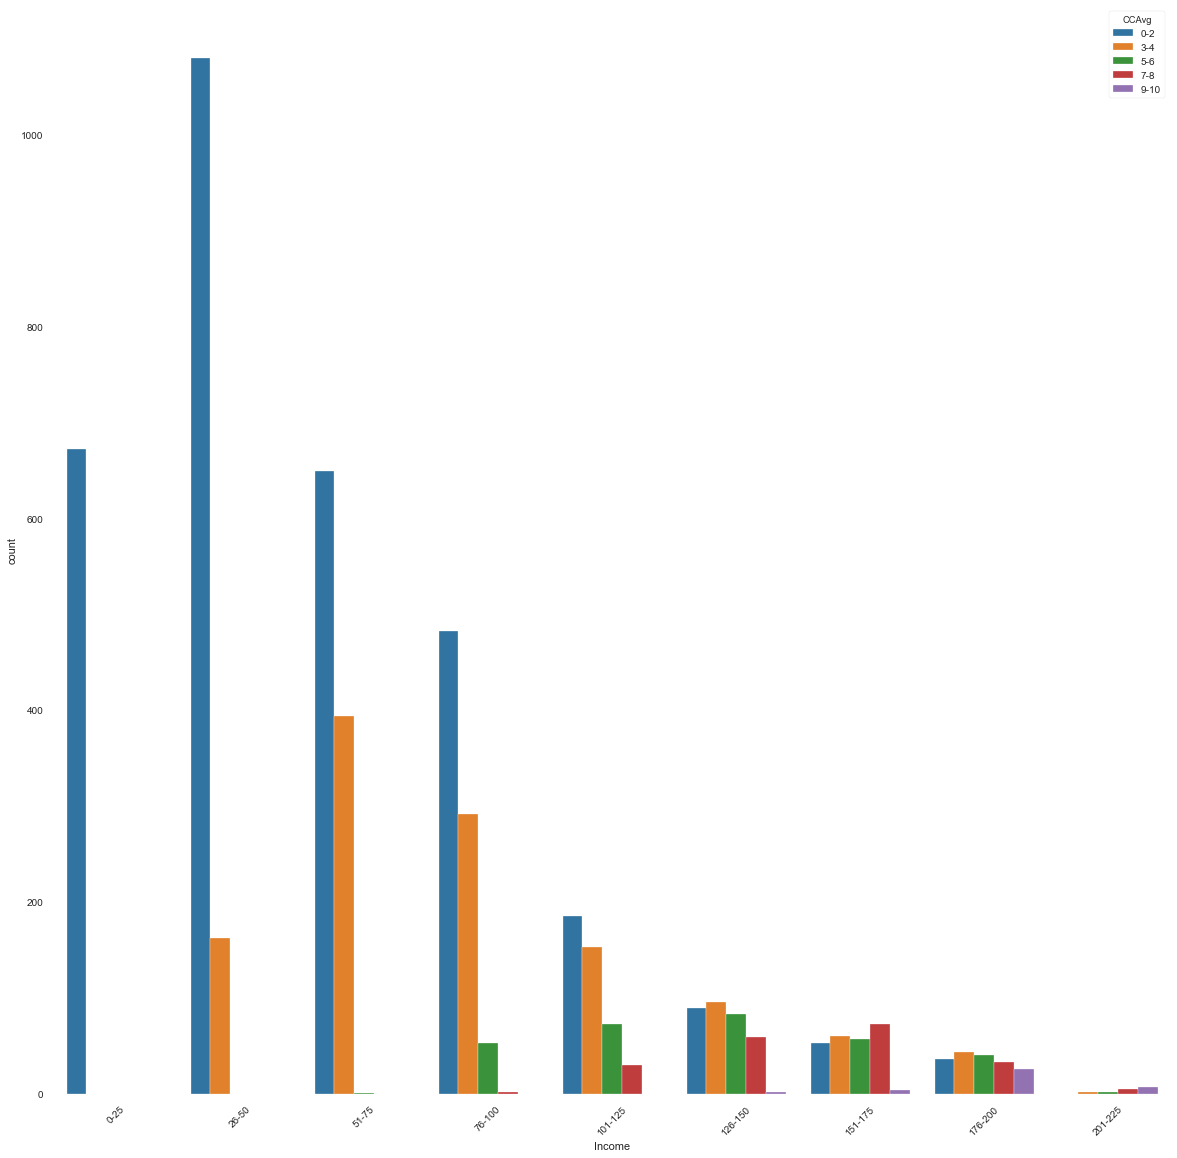

In [512]:
# Ploting CCAvg and Income
plt.figure(figsize=(20,20))
crs_tab = pd.crosstab(cp_bank_df.Income, cp_bank_df.CCAvg)

# sns.pairplot();
sns.countplot(x = 'Income',data=cp_bank_df,hue='CCAvg')
plt.xticks(rotation=45) # to rotate labels of x-axis

In [513]:
#Lets see how the Personal Loan target variable look with respect to the other variable
#cp_bank_df = cp_bank_df.drop(['ID', 'ZIP Code'], axis = 1)
print("Percentage of customer taking Personal loan % ", len(cp_bank_df[cp_bank_df['Personal Loan'] == 1])/cp_bank_df.shape[0]*100)
print("Percentage of custome not taking Personal loan % ", len(cp_bank_df[cp_bank_df['Personal Loan'] == 0])/cp_bank_df.shape[0]*100)

Percentage of customer taking Personal loan %  9.6
Percentage of custome not taking Personal loan %  90.4


In [514]:
#Only ~10% have taken loan 90% did no
cp_bank_df.groupby(by=['Personal Loan']).count()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [515]:
#Converting Mortagage to bins
bin_edges = [-np.inf, 100, 200,300,400, 500, 600, 700]   # edges to define intervals for Mortgage
# labels to denote each interval of Mortgage
bin_labels = ['0-100', '101-200', '201-300','301-400','401-500', '501-600', '601-700']   

#Modified above Mortgage to the range number
cp_bank_df['Mortgage'] = pd.cut(cp_bank_df['Mortgage'], bins=bin_edges , labels=bin_labels)

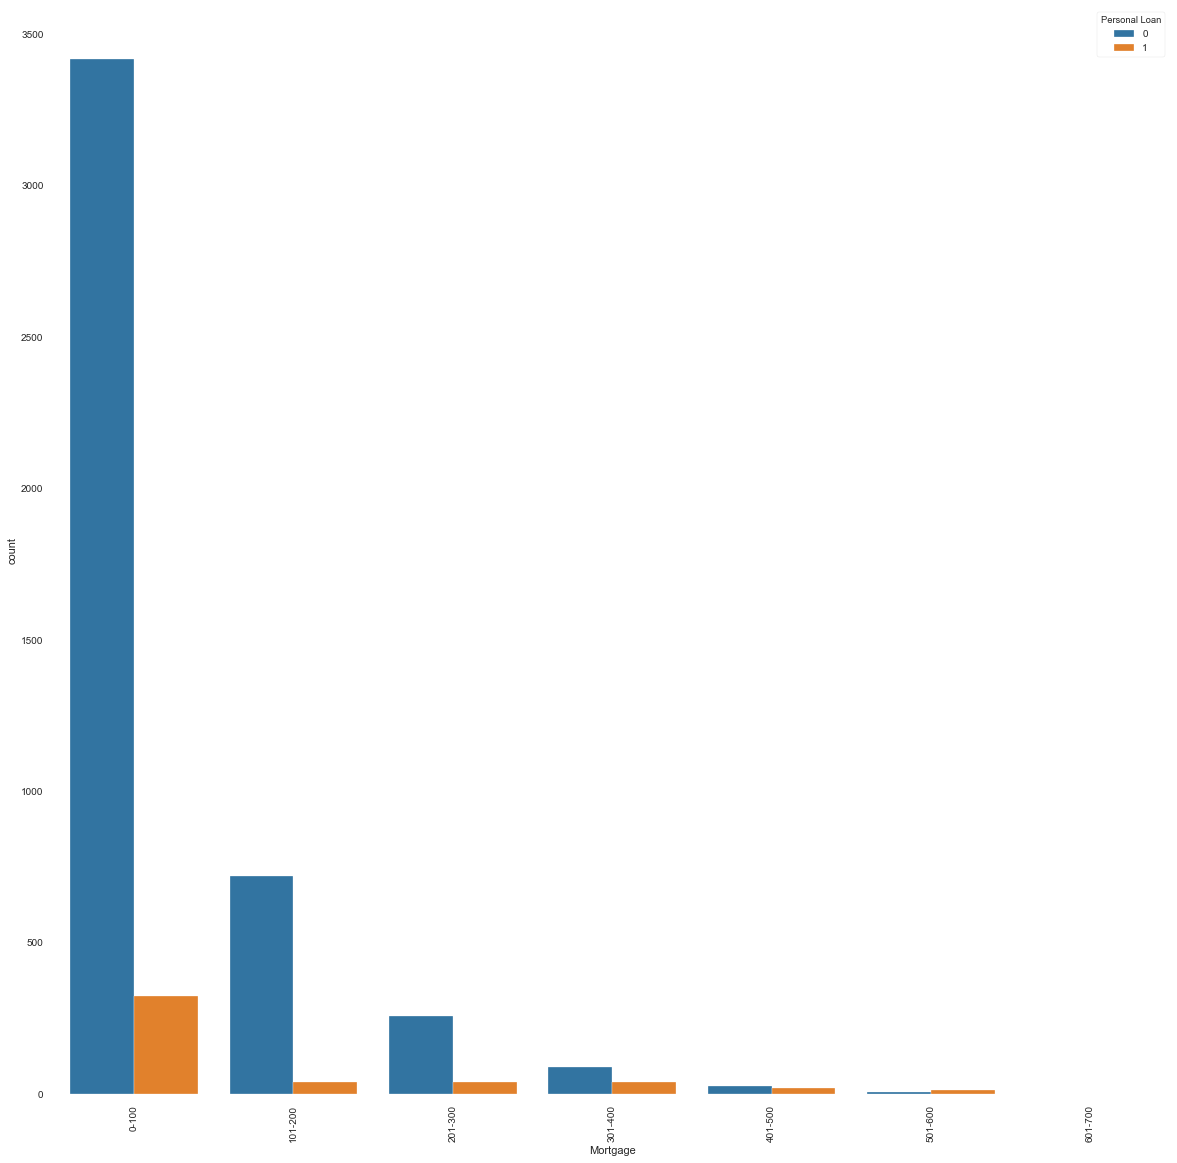

In [516]:
#Let's check some fact with Mortgage and CCAvg by plotting them
# cp_bank_df.info()
plt.figure(figsize=(20,20))
sns.countplot(x = 'Mortgage',data=cp_bank_df,hue='Personal Loan')
plt.xticks(rotation=90) # to rotate labels of x-axis
plt.show()
#It clearly shows that Mortgage is mostly 0 

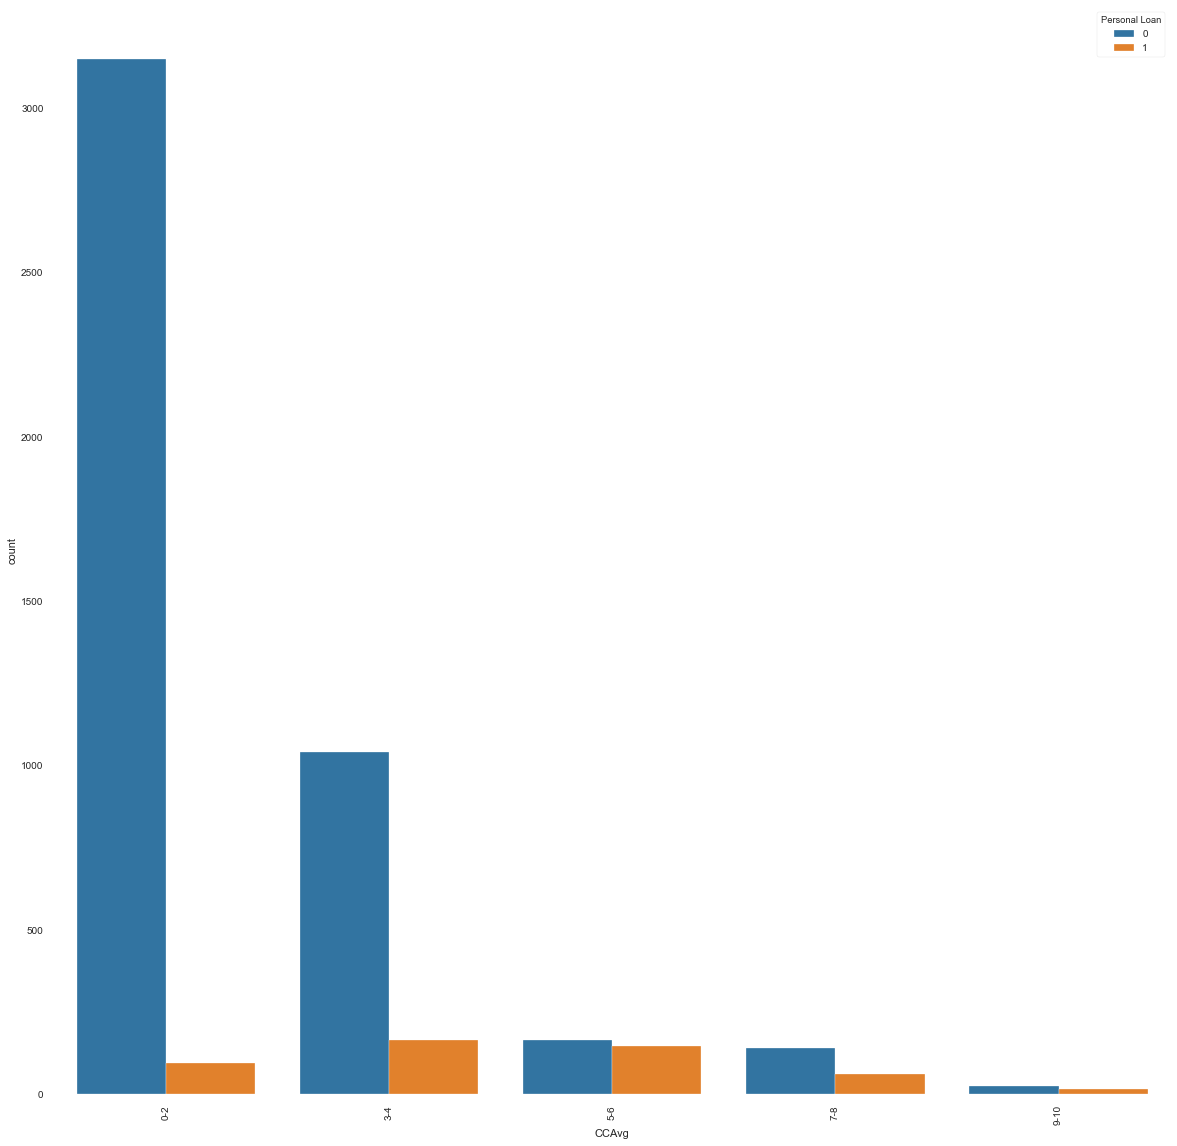

In [357]:
plt.figure(figsize=(20,20))
sns.countplot(x = 'CCAvg',data=cp_bank_df,hue='Personal Loan')
plt.xticks(rotation=90) # to rotate labels of x-axis
plt.show()

,Income,Personal Loan,value
0,0-25,0,672
1,0-25,1,0
2,26-50,0,1242
3,26-50,1,0
4,51-75,0,1037
5,51-75,1,7
6,76-100,0,795
7,76-100,1,35
8,101-125,0,339
9,101-125,1,102


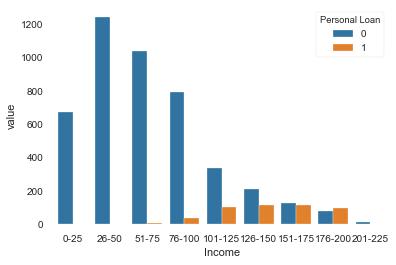

In [388]:
# Now we will do some cross tab with Personal Loan
cr_inc_df = pd.crosstab(cp_bank_df['Income'],cp_bank_df['Personal Loan'])
stacked = cr_inc_df.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Income, y=stacked.value, hue=stacked['Personal Loan'])
stacked

,Mortgage,Personal Loan,value
0,0-100,0,3419
1,0-100,1,325
2,101-200,0,719
3,101-200,1,39
4,201-300,0,257
5,201-300,1,40
6,301-400,0,88
7,301-400,1,40
8,401-500,0,28
9,401-500,1,20


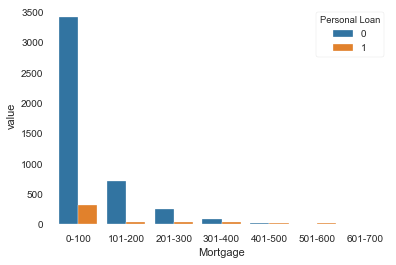

In [387]:

cr_mort_df = pd.crosstab(cp_bank_df['Mortgage'],cp_bank_df['Personal Loan'])
stacked = cr_mort_df.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Mortgage, y=stacked.value, hue=stacked['Personal Loan'])
stacked

In [360]:
#Converting Age to bins
bin_edges = [20,30,40,50,60,70]         # edges to define intervals for Mortgage
bin_labels = ['20-30', '31-40', '41-50','51-60','61-70']               # labels to denote each interval of experience
#Modified above Age to the range number
cp_bank_df['Age'] = pd.cut(cp_bank_df['Age'], bins=bin_edges , labels=bin_labels)

,Age,Personal Loan,value
0,20-30,0,558
1,20-30,1,66
2,31-40,0,1118
3,31-40,1,118
4,41-50,0,1148
5,41-50,1,122
6,51-60,0,1208
7,51-60,1,115
8,61-70,0,488
9,61-70,1,59


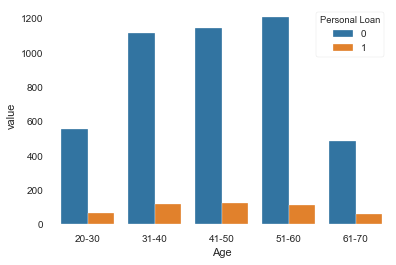

In [386]:
cr_age_df = pd.crosstab(cp_bank_df['Age'],cp_bank_df['Personal Loan'])
stacked = cr_age_df.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Age, y=stacked.value, hue=stacked['Personal Loan'])
stacked

As we have seen above the Personal loan is accepted by approx 10% of the people and when we see above graph and data with respect to Mortgage  Income and age the loan success is more with high Income category and in case of Mortgage the loan taker is in every category although the high Mortgage has less personal loan taker. Age shows a negative relationship with personal loan, as age grows the personal loan becomes less.

In [362]:
#Generated Profiling report to complete the EDA analysis, will upload the profile with project submission

#import pandas_profiling
import pandas_profiling 
# pandas_profiling.ProfileReport(bank_df)
pandas_profiling.ProfileReport(bank_df).to_file("Bank_profile.html")

C:\Users\mirajeev\AppData\Roaming\Python\Python37\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


# Modeling And Data preperation 
convert Personal loan to category variable. Drop unnecessary info from the data frame like ID and Zip code. I will do another modeling below with ZIP code and ID to see the impact of these independent variable.

In [517]:
cp_bank_model1_df = bank_df.copy()
cp_bank_model1_df = bank_df.drop(['ID', 'ZIP Code'], axis = 1)
cp_bank_model1_df['Personal Loan'] = cp_bank_model1_df['Personal Loan'].astype('category')
print(cp_bank_model1_df.head())
#just chcking things are good with data
print(cp_bank_model1_df.describe().transpose())
print(cp_bank_model1_df.info())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage Personal Loan  \
0   25           1      49       4    1.6          1         0             0   
1   45          19      34       3    1.5          1         0             0   
2   39          15      11       1    1.0          1         0             0   
3   35           9     100       1    2.7          2         0             0   
4   35           8      45       4    1.0          2         0             0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  
                     count       mean         std   min   25%   50%    75%  \
Age                 5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   
Experience          5000.0 

In [518]:
#Split the data into target and independent variable
clum = cp_bank_model1_df.columns.tolist()
clum.remove('Personal Loan')
#X_df is independent variableX_df = cp_bank_model1_df[clum]
#Target variable
Y_df = cp_bank_model1_df['Personal Loan']


In [519]:
####Logit model using Stat model
X_train, X_test, y_train, y_test = train_test_split( X_df, Y_df, test_size = 0.3, random_state = 42 )
print("Training number of row",X_train.shape[0])
print("Testing number of row",X_test.shape[0])
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

Training number of row 3500
Testing number of row 1500
Optimization terminated successfully.
         Current function value: 0.129155
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit            Pseudo R-squared: 0.580      
Dependent Variable:  Personal Loan    AIC:              932.0849   
Date:                2020-08-04 11:19 BIC:              1018.3322  
No. Observations:    3500             Log-Likelihood:   -452.04    
Df Model:            13               LL-Null:          -1077.3    
Df Residuals:        3486             LLR p-value:      2.4286e-259
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------
const              -8.4901   3.2911 -2.5798 0.0099 -14.9405 -2.0398
ID                 -0.0001   0.0001 -1.1796 0.2382  -0.0002  0.0000
Age                -0.0184   0.0694 -0.2656 0.7906  -0.1544  0.1175
Experience          0.0314   0.0692  0.4541 0.6497  -0.1042  0.1670
Income              0.0528   0.0031 17.2033 0.0000   0.0468  0.0588
ZIP Code           -0.0000   0.0000 -1.4981 0.1341  -0.0001  0.0000
Family              0.6999   0.0877  7.9773 0.0000   0.5279  0.8718
CCAvg               0.1183   0.0481  2.4596 0.0139   0.0240  0.2125
Education           1.6374   0.1350 12.1260 0.0000   1.3727  1.9021
Mortgage            0.0006   0.0006  0.9454 0.3444  -0.0007  0.0019
Securities Account -1.0083   0.3520 -2.8642 0.0042  -1.6982 -0.3183
CD Account          3.7280   0.3911  9.5333 0.0000   2.9616  4.4945
Online             -0.5571   0.1888 -2.9505 0.0032  -0.9272 -0.1870
CreditCard         -1.1850   0.2499 -4.7416 0.0000  -1.6748 -0.6951
===================================================================

"""

In [525]:
#Convert probabilities to target variable threshold at .6
y_pred_df = pd.DataFrame()
y_pred_df['actual'] = y_test
y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'
# Converted values which are above 0.6 as '1' and rest as '0'.
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.60 else 0)
# y_pred_df[0:5]

In [527]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Loan accepted", "Loan not accepted"] , yticklabels = ["Loan accepted", "Loan not accepted"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

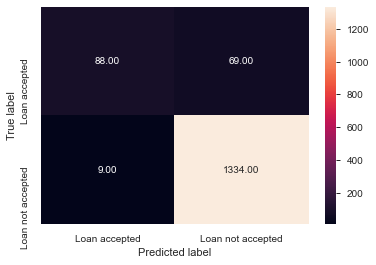

In [528]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [529]:

print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.91      0.56      0.69       157

    accuracy                           0.95      1500
   macro avg       0.93      0.78      0.83      1500
weighted avg       0.95      0.95      0.94      1500



In [531]:
#Making Threshold as .45
# Converted values which are above 0.45 as '1' and rest as '0'.
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.45 else 0)


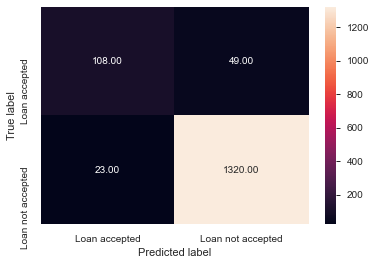

In [445]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [532]:
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.82      0.69      0.75       157

    accuracy                           0.95      1500
   macro avg       0.89      0.84      0.86      1500
weighted avg       0.95      0.95      0.95      1500



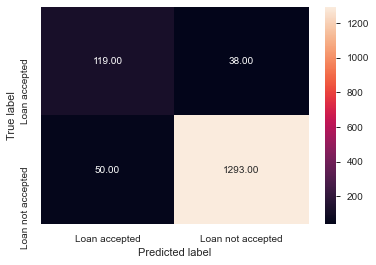

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1343
           1       0.70      0.76      0.73       157

    accuracy                           0.94      1500
   macro avg       0.84      0.86      0.85      1500
weighted avg       0.94      0.94      0.94      1500



In [533]:
#Making Threshold as .30
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.30 else 0)
# Converted values which are above 0.45 as '1' and rest as '0'.
draw_cm( y_pred_df.actual, y_pred_df.predicted )
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted))

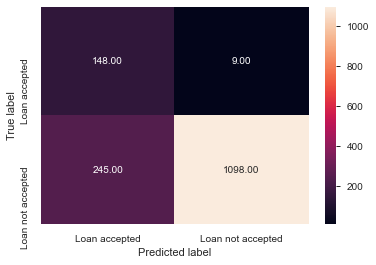

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1343
           1       0.38      0.94      0.54       157

    accuracy                           0.83      1500
   macro avg       0.68      0.88      0.72      1500
weighted avg       0.93      0.83      0.86      1500



In [534]:
#Making Threshold as .05
# Converted values which are above 0.05 as '1' and rest as '0'.
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.05 else 0)

draw_cm( y_pred_df.actual, y_pred_df.predicted )
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted))

Model number 2 with ZIP AND ID

In [535]:
#Another modeling with ID and ZIP.
cp_bank_model2_df = bank_df.copy()
cp_bank_model2_df['Personal Loan'] = cp_bank_model1_df['Personal Loan'].astype('category')
print(cp_bank_model2_df.head())
#just chcking things are good with data
print(cp_bank_model2_df.describe().transpose())
print(cp_bank_model2_df.info())
#Split the data now target and independent variable
clum = cp_bank_model2_df.columns.tolist()
clum.remove('Personal Loan')
#X_df is independent variable
X_df = cp_bank_model2_df[clum]
#Target variable
Y_df = cp_bank_model2_df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split( X_df, Y_df, test_size = 0.3, random_state = 42 )
print("Training number of row",X_train.shape[0])
print("Testing number of row",X_test.shape[0])
logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary2()

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

  Personal Loan  Securities Account  CD Account  Online  CreditCard  
0             0                   1           0       0           0  
1             0                   1           0       0           0  
2             0                   0           0       0           0  
3             0                   0           0       0           0  
4             0                   0           0       0           1  
                     count          mean          std     min       25%  \
ID                  5000

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit            Pseudo R-squared: 0.580      
Dependent Variable:  Personal Loan    AIC:              932.0849   
Date:                2020-08-04 11:26 BIC:              1018.3322  
No. Observations:    3500             Log-Likelihood:   -452.04    
Df Model:            13               LL-Null:          -1077.3    
Df Residuals:        3486             LLR p-value:      2.4286e-259
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------
const              -8.4901   3.2911 -2.5798 0.0099 -14.9405 -2.0398
ID                 -0.0001   0.0001 -1.1796 0.2382  -0.0002  0.0000
Age                -0.0184   0.0694 -0.2656 0.7906  -0.1544  0.1175
Experience          0.0314   0.0692  0.4541 0.6497  -0.1042  0.1670
Income              0.0528   0.0031 17.2033 0.0000   0.0468  0.0588
ZIP Code           -0.0000   0.0000 -1.4981 0.1341  -0.0001  0.0000
Family              0.6999   0.0877  7.9773 0.0000   0.5279  0.8718
CCAvg               0.1183   0.0481  2.4596 0.0139   0.0240  0.2125
Education           1.6374   0.1350 12.1260 0.0000   1.3727  1.9021
Mortgage            0.0006   0.0006  0.9454 0.3444  -0.0007  0.0019
Securities Account -1.0083   0.3520 -2.8642 0.0042  -1.6982 -0.3183
CD Account          3.7280   0.3911  9.5333 0.0000   2.9616  4.4945
Online             -0.5571   0.1888 -2.9505 0.0032  -0.9272 -0.1870
CreditCard         -1.1850   0.2499 -4.7416 0.0000  -1.6748 -0.6951
===================================================================

"""

As we can see above ZIP and ID  coffecient is very low hence droping them was the good thing we did in the stats model analysis. No need to generate any further number with these independent variable.

Next model with sklearn logistic regression

C:\Users\mirajeev\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['liblinear', 'saga']

[0.952, 0.909]

[0.95, 0.902]
[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.89, 0.89, 0.89, 0.89, 0.89, 0.89]

[0.887, 0.887, 0.887, 0.887, 0.887, 0.887]


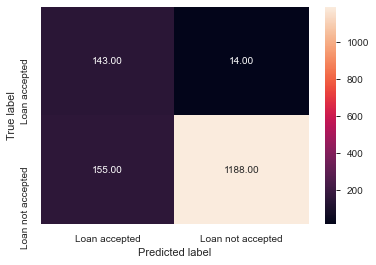

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1343
           1       0.48      0.91      0.63       157

    accuracy                           0.89      1500
   macro avg       0.73      0.90      0.78      1500
weighted avg       0.94      0.89      0.90      1500

[-7.02027884]
['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
[[-9.42938067e-02  9.76561745e-02  5.00061510e-02  5.28040665e-01
   2.14477129e-01  1.22069875e+00  5.32720178e-04 -9.04349538e-01
   3.40184771e+00 -6.56358942e-01 -1.04333480e+00]]


In [494]:
cp_bank_model2_df = bank_df.copy()

#Drop ID and ZIP
cp_bank_model2_df = bank_df.drop(['ID', 'ZIP Code'], axis = 1)


clum = cp_bank_model2_df.columns.tolist()
clum.remove('Personal Loan')
cp_bank_model2_df['Personal Loan'] = cp_bank_model2_df['Personal Loan'].astype('category')
#X is independent variable
X = cp_bank_model2_df[clum]

#Target variable
Y = cp_bank_model2_df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )

#Finding good model based ont the score
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

# Running a loop to check optimal value of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=1)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

# Taking liblinear and C= 1 because of above output
lr = LogisticRegression(max_iter=10000000, random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=.75)
# lr = LogisticRegression(C= 1, max_iter=10000, random_state=7)
lr.fit(X_train,y_train)
z = pd.DataFrame()          # creating a new dataframe to store the output 
z['Actual'] = y_test.values       # Storing actual output of target variable

z['Probaility that output is 0'] = lr.predict_proba(X_test)[:,0] ## probablity of 0
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = lr.predict_proba(X_test)[:,1] ## probablity of 1

z['Predicted'] =  lr.predict(X_test)  # Predicting target variable using sklearn Logistic regression

# In sklearn default threshold is 0.5
# therfore for all the values whose probability is greater than 0.5 will be predicted as 1

draw_cm( z.Actual, z.Predicted )
print(metrics.classification_report(z.Actual, z.Predicted))
# printing intercept and cofficeint to get a feel on how the independent variable impact target
print(lr.intercept_)
print(clum)
print(lr.coef_)

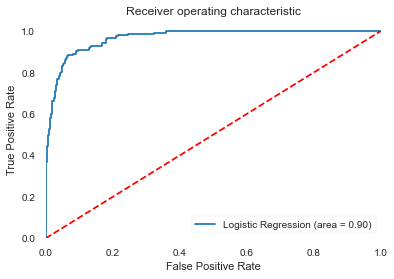

In [486]:
# ROC curve
#ROC curve for above model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The logit model analysis with diferent model and threshold clearly shows that personal loan is accepted more by the customer, if option is provided to more number of customer that means a lower threshold is better. As shown by the cofecient of the logit function, customer with higher income, education Family, more Creditcard spending and certificate deposit will have higher chance of accepting the loan. On the other side things which negatively impacts the loan appliction are Age, Securities Account, Online and Credit card.
The lower threshold helps in getting more application being accepted as shown by better recall value of accepted case, precision drops but that should be fine as false FP goes up, FP (False positive) should not be a cause of concern in this scenario.

Data for loan application processing cost and loan default is not provided so analysis is based on assumption that zero default happens and loan application are not expensive to process. If assumption is not correct it is better to keep the threshhold high and that will give us better sucess rate(high precision value for accepted application) as bank will not be sending offer to customer who will not accept the personal loan offer.

The model selected is also showing a good ROC curve also, more the area of the ROC cure it means we have good true positive rate and less false positive rate. The logit sklearn model and stat model are showing almost identical results (stat model with threshhold at .05 has very simillar result like precesion, recall and F1).
